In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.font_manager as fm

In [2]:
from configs.db_config import get_db_engine

['DejaVu Serif', 'DejaVu Sans Display', 'STIXSizeTwoSym', 'STIXGeneral', 'DejaVu Sans Mono', 'STIXNonUnicode', 'DejaVu Serif', 'STIXNonUnicode', 'STIXSizeFourSym', 'DejaVu Sans Mono', 'cmr10', 'STIXNonUnicode', 'DejaVu Sans', 'DejaVu Sans', 'STIXGeneral', 'STIXSizeThreeSym', 'DejaVu Sans', 'DejaVu Serif', 'cmsy10', 'DejaVu Sans Mono', 'STIXSizeFourSym', 'STIXSizeThreeSym', 'DejaVu Sans Mono', 'DejaVu Serif', 'STIXSizeFiveSym', 'DejaVu Sans', 'cmb10', 'cmss10', 'STIXGeneral', 'cmmi10', 'STIXSizeOneSym', 'cmex10', 'cmtt10', 'STIXGeneral', 'STIXNonUnicode', 'DejaVu Serif Display', 'STIXSizeTwoSym', 'STIXSizeOneSym', 'Arial Rounded MT Bold', 'Georgia', 'Verdana', 'Century', 'Gill Sans MT', 'Sitka', 'Agency FB', 'Wingdings 3', 'Microsoft New Tai Lue', 'Yet R', 'Calibri', 'Showcard Gothic', 'Pristina', 'Bodoni MT', 'Bradley Hand ITC', 'Segoe UI', 'High Tower Text', 'Viner Hand ITC', 'Corbel', 'Lucida Sans', 'Arial', 'Franklin Gothic Medium', 'Yu Gothic', 'Goudy Old Style', 'Bodoni MT', 'Time

c:\Users\SSAFY\Desktop\Medi-Budget\backend\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\SSAFY\Desktop\Medi-Budget\backend\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44544 (\N{HANGUL SYLLABLE GEUL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\SSAFY\Desktop\Medi-Budget\backend\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\SSAFY\Desktop\Medi-Budget\backend\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\SSAFY\Desktop\Medi-Budget\backend\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47785 (

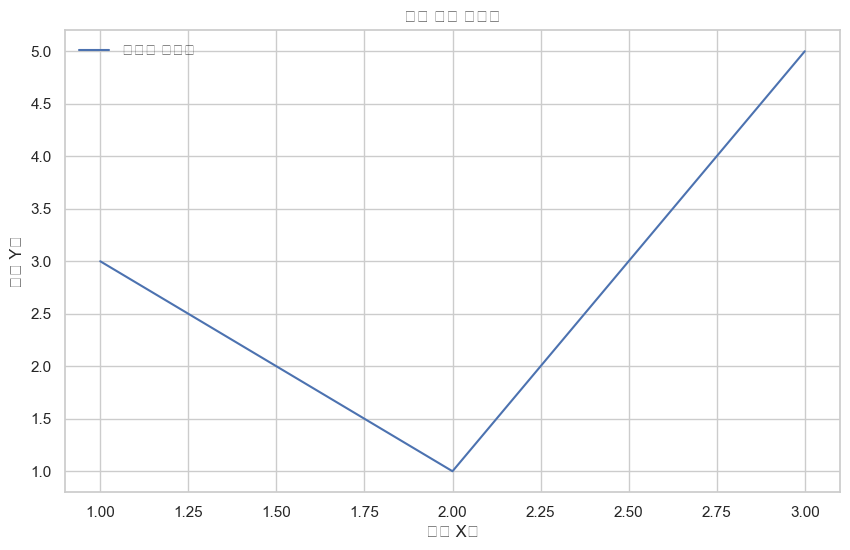

In [29]:
# matplotilb 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시 마이너스 깨짐 방지
# print(plt.style.available)
plt.style.use('seaborn-v0_8-white')
sns.set_theme(style="whitegrid")

# 시스템에 설치된 폰트 목록 확인
font_list = [font.name for font in fm.fontManager.ttflist]
print(font_list)

# 테스트 그래프 그리기
plt.figure(figsize=(10, 6))
plt.title('한글 제목 테스트')
plt.plot([1, 2, 3], [3, 1, 5], label='테스트 데이터')
plt.xlabel('한글 X축')
plt.ylabel('한글 Y축')
plt.legend()
plt.show()


In [4]:
# 결과 저장 폴더 생성
RESULT_DIR = '../analsys_results'
os.makedirs(RESULT_DIR, exist_ok=True)

In [5]:
# 데이터 베이스에서 데이터 불러오기
engine = get_db_engine()

In [6]:
# 테이블 목록 불러오기
tables_query = """
SELECT table_name 
FROM information_schema.tables 
WHERE table_schema='public'
ORDER BY table_name;
"""
tables = pd.read_sql_query(tables_query, engine)
print("데이터베이스 테이블 목록:")
display(tables)

데이터베이스 테이블 목록:


,table_name
0,age_based_costs
1,diseases
2,hospital_based_costs
3,hospital_types
4,raw_medical_data
5,region_based_costs
6,regions


In [7]:
## 4. 각 테이블 데이터 로드
# 질병명 테이블
disease_df = pd.read_sql_query("SELECT * FROM diseases", engine)
print("\n질병명 테이블 미리보기:")
display(disease_df.head())


질병명 테이블 미리보기:


,disease_id,disease_code,disease_name
0,1,A04,기타 세균성 장감염
1,2,A08,바이러스성 및 기타 명시된 장감염
2,3,A09,감염성 및 상세불명 기원의 기타 위장염 및 결장염
3,4,B00,헤르페스바이러스[단순헤르페스] 감염
4,5,B02,대상포진


In [8]:
# 의료기관 종별 테이블
hospital_type_df = pd.read_sql_query("SELECT * FROM hospital_types", engine)
print("\n의료기관 종별 테이블 미리보기:")
display(hospital_type_df.head())


의료기관 종별 테이블 미리보기:


,hospital_type_id,hospital_type
0,1,병원급
1,2,보건기관등
2,3,상급종합병원
3,4,의원급
4,5,종합병원


In [9]:
# 지역 테이블
region_df = pd.read_sql_query("SELECT * FROM regions", engine)
print("\n지역 테이블 미리보기:")
display(region_df.head())


지역 테이블 미리보기:


,region_id,region_name
0,1,강원
1,2,경기
2,3,경남
3,4,경북
4,5,광주


In [10]:
# 연령대별 진료비 테이블
age_cost_df = pd.read_sql_query("SELECT * FROM age_based_costs", engine)
print("\n연령대별 진료비 테이블 미리보기:")
display(age_cost_df.head())


연령대별 진료비 테이블 미리보기:


,age_costs_id,age_group,disease_id,disease_name,patient_count,visit_count,medical_care_cost_total,insurance_payment,patient_payment,patient_payment_per_visit,patient_payment_per_patient,year,rank
0,1,0~4세,2,바이러스성 및 기타 명시된 장감염,59351,91615,2369572.0,1858301.0,511271.0,5.58,8.61,2021,35
1,2,0~4세,2,바이러스성 및 기타 명시된 장감염,80853,123681,3239793.0,2543662.0,696131.0,5.63,8.61,2022,35
2,3,0~4세,2,바이러스성 및 기타 명시된 장감염,70021,106966,2694138.0,2127831.0,566307.0,5.29,8.09,2023,35
3,4,0~4세,3,감염성 및 상세불명 기원의 기타 위장염 및 결장염,456585,897896,21434406.0,17155397.0,4279009.0,4.77,9.37,2021,4
4,5,0~4세,3,감염성 및 상세불명 기원의 기타 위장염 및 결장염,599307,1297609,31029525.0,24720096.0,6309429.0,4.86,10.53,2022,4


In [11]:
# 의료기관 종별 진료비 테이블
hospital_cost_df = pd.read_sql_query("SELECT * FROM hospital_based_costs", engine)
print("\n의료기관 종별 진료비 테이블 미리보기:")
display(hospital_cost_df.head())


의료기관 종별 진료비 테이블 미리보기:


,hospital_costs_id,hospital_type_id,hospital_type,disease_id,disease_name,patient_count,visit_count,medical_care_cost_total,insurance_payment,patient_payment,patient_payment_per_visit,patient_payment_per_patient,year
0,1,1,병원급,1,기타 세균성 장감염,30003.0,111046.0,16350861.0,13023195.0,3327666.0,29.97,110.91,2021
1,2,1,병원급,1,기타 세균성 장감염,26567.0,91375.0,13390921.0,10644821.0,2746100.0,30.05,103.37,2022
2,3,1,병원급,1,기타 세균성 장감염,29201.0,100559.0,15324570.0,12321296.0,3003274.0,29.87,102.85,2023
3,4,1,병원급,2,바이러스성 및 기타 명시된 장감염,36617.0,108080.0,16171642.0,14232513.0,1939129.0,17.94,52.96,2021
4,5,1,병원급,2,바이러스성 및 기타 명시된 장감염,43836.0,111719.0,15581570.0,13645537.0,1936033.0,17.33,44.17,2022


In [12]:
# 지역별 진료비 테이블
region_cost_df = pd.read_sql_query("SELECT * FROM region_based_costs", engine)
print("\n지역별 진료비 테이블 미리보기:")
display(region_cost_df.head())



지역별 진료비 테이블 미리보기:


,region_costs_id,region_id,region_name,disease_id,disease_name,patient_count,visit_count,medical_care_cost_total,insurance_payment,patient_payment,patient_payment_per_visit,patient_payment_per_patient,year
0,1,1,강원,1,기타 세균성 장감염,8879,17158,1861793.0,1454094.0,407699.0,23.76,45.92,2021
1,2,1,강원,1,기타 세균성 장감염,9372,17874,2102544.0,1633498.0,469046.0,26.24,50.05,2022
2,3,1,강원,1,기타 세균성 장감염,8931,17190,2260335.0,1755343.0,504992.0,29.38,56.54,2023
3,4,1,강원,2,바이러스성 및 기타 명시된 장감염,5787,8584,352665.0,271251.0,81414.0,9.48,14.07,2021
4,5,1,강원,2,바이러스성 및 기타 명시된 장감염,7241,10629,523007.0,427152.0,95855.0,9.02,13.24,2022


In [13]:
## 5. 기본 데이터 특성 파악

# 연령대별 진료비 테이블 기본 통계
print("\n연령대별 진료비 테이블 기본 통계:")
display(age_cost_df.describe())


연령대별 진료비 테이블 기본 통계:


,age_costs_id,disease_id,patient_count,visit_count,medical_care_cost_total,insurance_payment,patient_payment,patient_payment_per_visit,patient_payment_per_patient,year,rank
count,3600.000000,3600.000000,3.600000e+03,3.600000e+03,3.600000e+03,3.600000e+03,3.600000e+03,3600.000000,3600.00000,3600.00000,3600.00000
mean,1800.500000,105.464167,2.026647e+05,5.253886e+05,2.296435e+07,1.602464e+07,6.939715e+06,14.615797,35.19885,2022.00000,50.50000
std,1039.374812,57.411665,3.000234e+05,9.975212e+05,4.914667e+07,3.577131e+07,1.403940e+07,14.032237,44.80872,0.81661,28.87008
min,1.000000,1.000000,4.030000e+02,5.400000e+02,1.290800e+04,8.382000e+03,4.195000e+03,1.660000,2.74000,2021.00000,1.00000
25%,900.750000,62.750000,5.827750e+04,1.119108e+05,3.538711e+06,2.450518e+06,1.023638e+06,6.670000,11.85000,2021.00000,25.75000
50%,1800.500000,102.000000,1.152595e+05,2.500475e+05,9.602224e+06,6.545354e+06,3.004131e+06,10.905000,22.16500,2022.00000,50.50000
75%,2700.250000,144.000000,2.265015e+05,5.112760e+05,2.211154e+07,1.500446e+07,7.060841e+06,16.627500,43.52000,2023.00000,75.25000
max,3600.000000,219.000000,3.835202e+06,1.565055e+07,7.897398e+08,5.539522e+08,2.357877e+08,160.150000,636.39000,2023.00000,100.00000


In [14]:
# 데이터 타입 확인
# unique() : 각 열에 있는 고유한(중복되지 않는) 값의 개수를 계산하는 함수
# iloc[0]: 0번째 인덱스값을 가져옴.
print("\n 데이터 타입 확인:")
data_types = pd.DataFrame(age_cost_df.dtypes, columns=['데이터 타입'])
data_types['고유값 수'] = [age_cost_df[col].nunique() for col in age_cost_df.columns]
data_types['샘플값'] = [age_cost_df[col].iloc[0] if not age_cost_df[col].empty else None for col in age_cost_df.columns]
display(data_types)


 데이터 타입 확인:


,데이터 타입,고유값 수,샘플값
age_costs_id,int64,3600,1
age_group,object,12,0~4세
disease_id,int64,219,2
disease_name,object,219,바이러스성 및 기타 명시된 장감염
patient_count,int64,3579,59351
visit_count,int64,3595,91615
medical_care_cost_total,float64,3599,2369572.0
insurance_payment,float64,3598,1858301.0
patient_payment,float64,3596,511271.0
patient_payment_per_visit,float64,1954,5.58


In [15]:
## 6. 질환별 분석

# 전체 다빈도 top 20 질환 추출
top_diseases_query = """
    SELECT d.disease_name as 질병명, AVG(rd.patient_payment_per_visit) as 평균방문당진료비, AVG(rd.patient_payment_per_patient) as 평균환자당진료비,
        AVG(rd.patient_count) as 평균환자수, SUM(rd.patient_count) as 총환자수, AVG(rd.visit_count) as 평균방문일수,
        AVG(rd.insurance_payment) as 평균보험자비용, AVG(rd.medical_care_cost_total) as 평균요양급여총비용
    FROM raw_medical_data rd
    JOIN diseases d ON rd.disease_code = d.disease_code
    GROUP BY d.disease_name
    ORDER BY 총환자수 DESC
    LIMIT 20
"""

top_diseases = pd.read_sql_query(top_diseases_query, engine)

print("\n 다빈도 질환 top 20:")
display(top_diseases)


 다빈도 질환 top 20:


,질병명,평균방문당진료비,평균환자당진료비,평균환자수,총환자수,평균방문일수,평균보험자비용,평균요양급여총비용
0,치은염 및 치주질환,14.604118,29.786765,1.630162e+06,166276490,3.447642e+06,1.196652e+08,1.716607e+08
1,급성 기관지염,5.991569,16.309608,1.109177e+06,113136084,3.454521e+06,5.320384e+07,6.923968e+07
2,U07의 응급사용,20.254118,111.162059,9.978454e+05,101780226,2.255936e+06,1.229177e+08,1.553714e+08
3,본태성(원발성) 고혈압,8.144023,44.390115,7.609627e+05,66203759,4.940860e+06,8.982003e+07,1.194688e+08
4,치아우식,15.619216,27.152941,5.591708e+05,57035423,9.518751e+05,3.652327e+07,5.146314e+07
5,혈관운동성 및 알레르기성 비염,6.427941,13.759216,5.520779e+05,56311945,1.278692e+06,1.889980e+07,2.550394e+07
6,등통증,14.164167,52.260937,5.389787e+05,51741953,2.245244e+06,7.584502e+07,1.060127e+08
7,위염 및 십이지장염,13.687451,22.581275,4.516298e+05,46066236,7.744730e+05,2.034796e+07,2.962513e+07
8,위-식도역류병,12.427172,24.451818,4.527843e+05,44825650,9.214311e+05,2.204645e+07,3.220578e+07
9,다발성 및 상세불명 부위의 급성 상기도감염,6.730882,11.280882,4.030704e+05,41113183,7.333375e+05,1.241548e+07,1.614731e+07


C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\2649616836.py:7: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\2649616836.py:7: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\2649616836.py:7: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\2649616836.py:7: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\2649616836.py:7: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\2649616836.py:7: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from font(s) Arial.
  plt.tight_lay

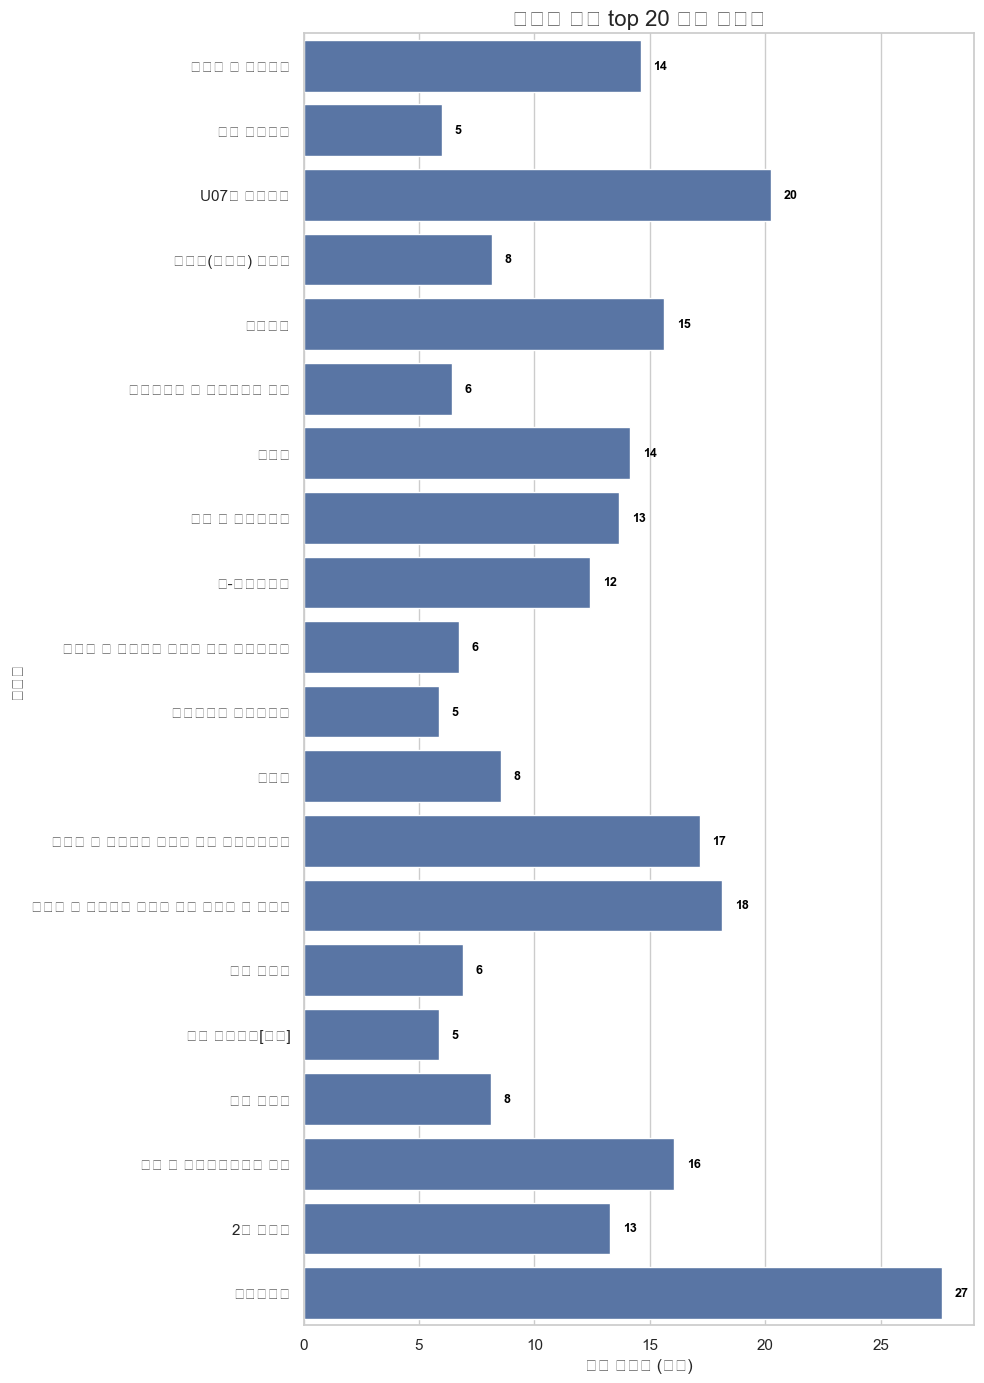

In [30]:
# 다빈도 질환 시각화
plt.figure(figsize=(10, 14))
ax = sns.barplot(y='질병명', x='평균방문당진료비', data=top_diseases)
plt.title('다빈도 질환 top 20 평균 진료비', fontsize=16)
plt.ylabel('질병명', fontsize=12)
plt.xlabel('평균 진료비 (천원)', fontsize=12)
plt.tight_layout()

# 값 레이블 표시
for i, bar in enumerate(ax.patches):
    ax.text(bar.get_width() + (top_diseases['평균방문당진료비'].max() * 0.02),  # 최대값의 2% 정도 오른쪽에 표시
            bar.get_y() + bar.get_height()/2,
            f'{int(bar.get_width()):,}',
            va='center', fontsize=9, color='black', fontweight='bold')
plt.show()


C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\1661817829.py:35: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\1661817829.py:35: UserWarning: Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\1661817829.py:35: UserWarning: Glyph 50684 (\N{HANGUL SYLLABLE YEOM}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\1661817829.py:35: UserWarning: Glyph 48143 (\N{HANGUL SYLLABLE MIC}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\1661817829.py:35: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\1661817829.py:35: UserWarning: Glyph 51656 (\N{HANGUL SYLLABLE JIL}) missing from font(s) Arial.
  plt.tight_la

<Figure size 1200x600 with 0 Axes>

c:\Users\SSAFY\Desktop\Medi-Budget\backend\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\SSAFY\Desktop\Medi-Budget\backend\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\SSAFY\Desktop\Medi-Budget\backend\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50684 (\N{HANGUL SYLLABLE YEOM}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\SSAFY\Desktop\Medi-Budget\backend\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48143 (\N{HANGUL SYLLABLE MIC}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\SSAFY\Desktop\Medi-Budget\backend\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51452 (

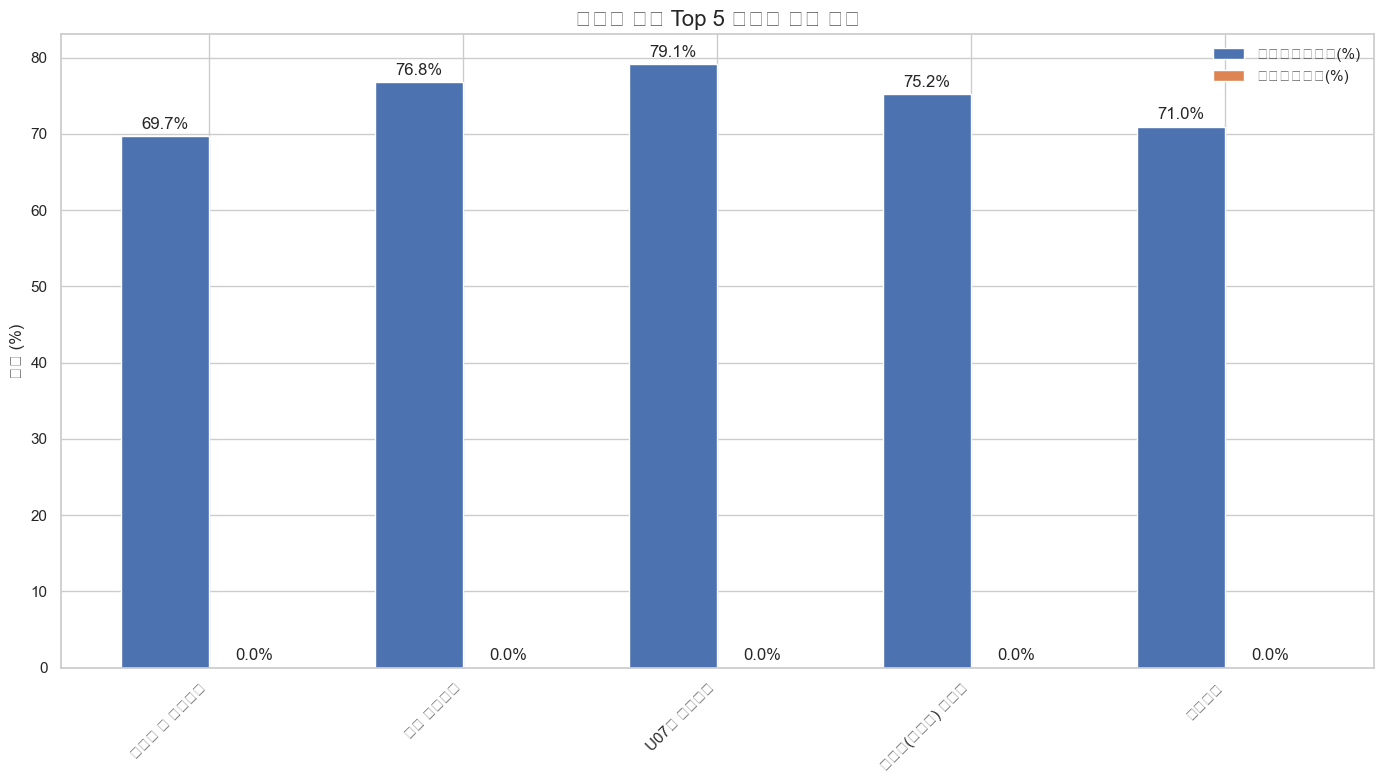

In [33]:
# 질환별 진료비 구성 비율 분석
top_diseases['보험자비율'] = top_diseases['평균보험자비용'] / top_diseases['평균요양급여총비용'] * 100
top_diseases['환자부담비율'] = top_diseases['평균환자당진료비'] / top_diseases['평균요양급여총비용'] * 100

# 질환별 진료비 구성 비율 시각화
top_5_diseases = top_diseases.head()

plt.figure(figsize=(12, 6))
x = np.arange(len(top_5_diseases))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - width/2, top_5_diseases['보험자비율'], width, label='보험자부담비율(%)')
rects2 = ax.bar(x + width/2, top_5_diseases['환자부담비율'], width, label='환자부담비율(%)')

ax.set_title('다빈도 질환 Top 5 진료비 구성 비율', fontsize=16)
ax.set_ylabel('비율 (%)', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(top_5_diseases['질병명'], rotation=45, ha='right')
ax.legend()

# 값 레이블 표시
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()


In [78]:
## 7. 연령대별 진료 패턴 분석

# 연령대별 평균 진료비 추이
age_cost_avg_query = """
    SELECT a.age_group as 연령대, AVG(a.patient_payment_per_visit) as 평균방문당진료비, AVG(a.patient_payment_per_patient) as 평균환자당진료비,
        AVG(a.patient_count) as 평균환자수, SUM(a.patient_count) as 총환자수, AVG(a.visit_count) as 평균방문일수,
        AVG(a.insurance_payment) as 평균보험자비용, AVG(a.medical_care_cost_total) as 평균요양급여총비용
    FROM age_based_costs a
    GROUP BY age_group
    ORDER BY age_group
"""
age_cost_avg = pd.read_sql_query(age_cost_avg_query, engine)

print("\n연령대별 평균 진료비:")
display(age_cost_avg)


연령대별 평균 진료비:


,연령대,평균방문당진료비,평균환자당진료비,평균환자수,총환자수,평균방문일수,평균보험자비용,평균요양급여총비용
0,0~4세,7.395933,15.079700,116890.383333,35067115,380112.553333,6.788567e+06,8.403298e+06
1,10~14세,12.434100,29.793567,110868.380000,33260514,210241.886667,5.376470e+06,7.804209e+06
2,15~19세,11.589167,23.322700,96030.730000,28809219,178499.006667,4.265901e+06,6.057309e+06
3,20~29세,14.490733,28.044800,237981.290000,71394387,435892.416667,1.367893e+07,1.965678e+07
4,30~39세,16.902933,37.528567,265964.070000,79789221,545503.570000,1.844812e+07,2.643095e+07
5,40~49세,18.104133,37.784467,312781.016667,93834305,699458.876667,2.070176e+07,3.073644e+07
6,5~9세,12.126800,28.658667,142482.330000,42744699,329937.843333,7.441806e+06,1.065960e+07
7,50~59세,17.719167,39.762033,375017.626667,112505288,975915.746667,2.798969e+07,4.176984e+07
8,60~64세,17.324967,41.096633,217305.826667,65191748,615446.043333,1.744316e+07,2.632915e+07
9,65~69세,17.106667,43.058833,190865.726667,57259718,587194.666667,2.185432e+07,3.121824e+07


C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\149012561.py:12: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\149012561.py:12: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\149012561.py:12: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\149012561.py:12: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\149012561.py:12: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\149012561.py:12: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) Arial.
  plt.tight_layou

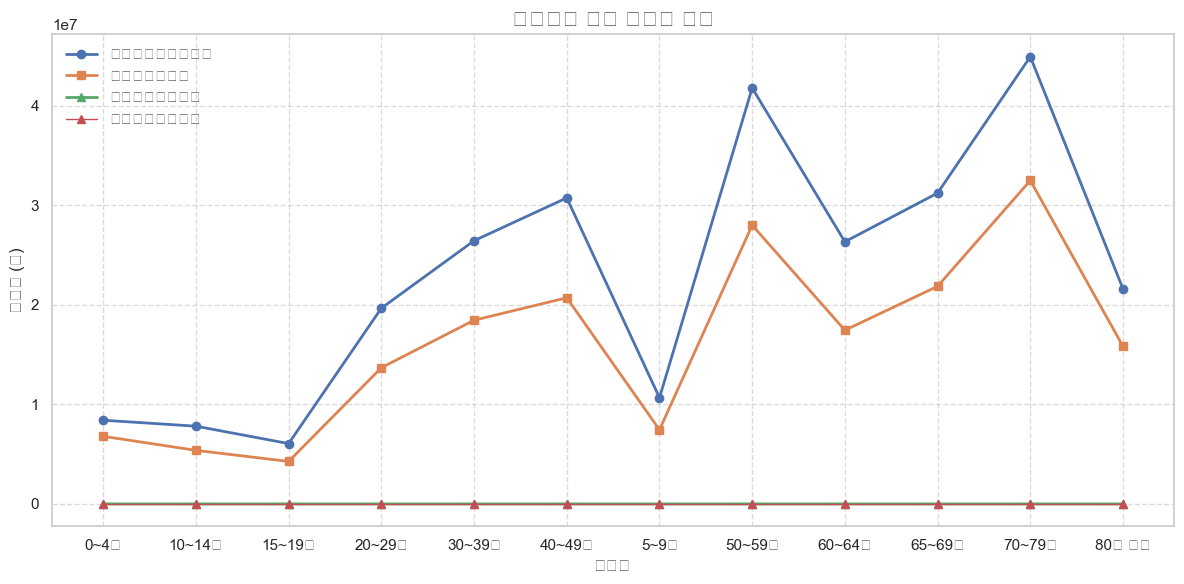

In [41]:
# 연령대별 평균 진료비 시각화
plt.figure(figsize=(12, 6))
plt.plot(age_cost_avg['age_group'], age_cost_avg['평균요양급여총비용'], marker='o', linewidth=2, label='평균요양급여총비용')
plt.plot(age_cost_avg['age_group'], age_cost_avg['평균보험자비용'], marker='s', linewidth=2, label='평균보험자비용')
plt.plot(age_cost_avg['age_group'], age_cost_avg['평균환자당진료비'], marker='^', linewidth=2, label='평균환자당진료비')
plt.plot(age_cost_avg['age_group'], age_cost_avg['평균방문당진료비'], marker='^', linewidth=1, label='평균방문당진료비')
plt.title('연령대별 평균 진료비 추이', fontsize=16)
plt.xlabel('연령대', fontsize=12)
plt.ylabel('진료비 (원)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


In [80]:
# 연령대별 다빈도 질환 분석
age_disease_query = """
    SELECT a.age_group as 연령대, d.disease_name as 질환명, a.visit_count
    FROM age_based_costs a
    JOIN diseases d ON a.disease_name = d.disease_name
"""
age_data = pd.read_sql_query(age_disease_query, engine)

# 그룹화 및 내원일수 합계
age_disease = age_data.groupby(['연령대', '질환명'])['visit_count'].sum().reset_index()
age_disease.rename(columns={'visit_count': '내원일수'}, inplace=True)


In [83]:
# 연령대 정렬을 위한 커스텀 키 함수 정의
def age_group_sorter(age_str):
    if '~' in age_str:
        start_age = int(age_str.split('~')[0].replace('세', ''))
    else:
        start_age = int(age_str.split('세')[0])  # 다른 형식일 경우 기본값
    return start_age

# 연령대별 정렬된 순서
sorted_age_groups = sorted(age_disease['연령대'].unique(), key=age_group_sorter)

# 각 연령대별 상위 3개 질환 추출
top_diseases_by_age = []
for age in sorted_age_groups:
    age_group_data = age_disease[age_disease['연령대'] == age].sort_values('내원일수', ascending=False)
    top_3 = age_group_data.head(3)
    top_diseases_by_age.append(top_3)

top_diseases_by_age_df = pd.concat(top_diseases_by_age).reset_index(drop=True)

print("\n연령대별 다빈도 질환 Top 3:")
display(top_diseases_by_age_df)



연령대별 다빈도 질환 Top 3:


,연령대,질환명,내원일수
0,0~4세,급성 기관지염,34408823
1,0~4세,혈관운동성 및 알레르기성 비염,8838001
2,0~4세,급성 부비동염,6689594
3,5~9세,급성 기관지염,20435300
4,5~9세,혈관운동성 및 알레르기성 비염,7714878
5,5~9세,치아의 발육 및 맹출 장애,6974167
6,10~14세,급성 기관지염,7470714
7,10~14세,U07의 응급사용,4251959
8,10~14세,치아우식,3477792
9,15~19세,급성 기관지염,4766212


C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\2269509256.py:2: FutureWarning: The provided callable <function sum at 0x000001FE7E6183A0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_age_disease = pd.pivot_table(
c:\Users\SSAFY\Desktop\Medi-Budget\backend\venv\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 44553 (\N{HANGUL SYLLABLE GEUB}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\SSAFY\Desktop\Medi-Budget\backend\venv\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\SSAFY\Desktop\Medi-Budget\backend\venv\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\SSAFY\Desktop\Medi-Budget\backend\venv\lib\site-packages\seaborn\utils.py:61: U

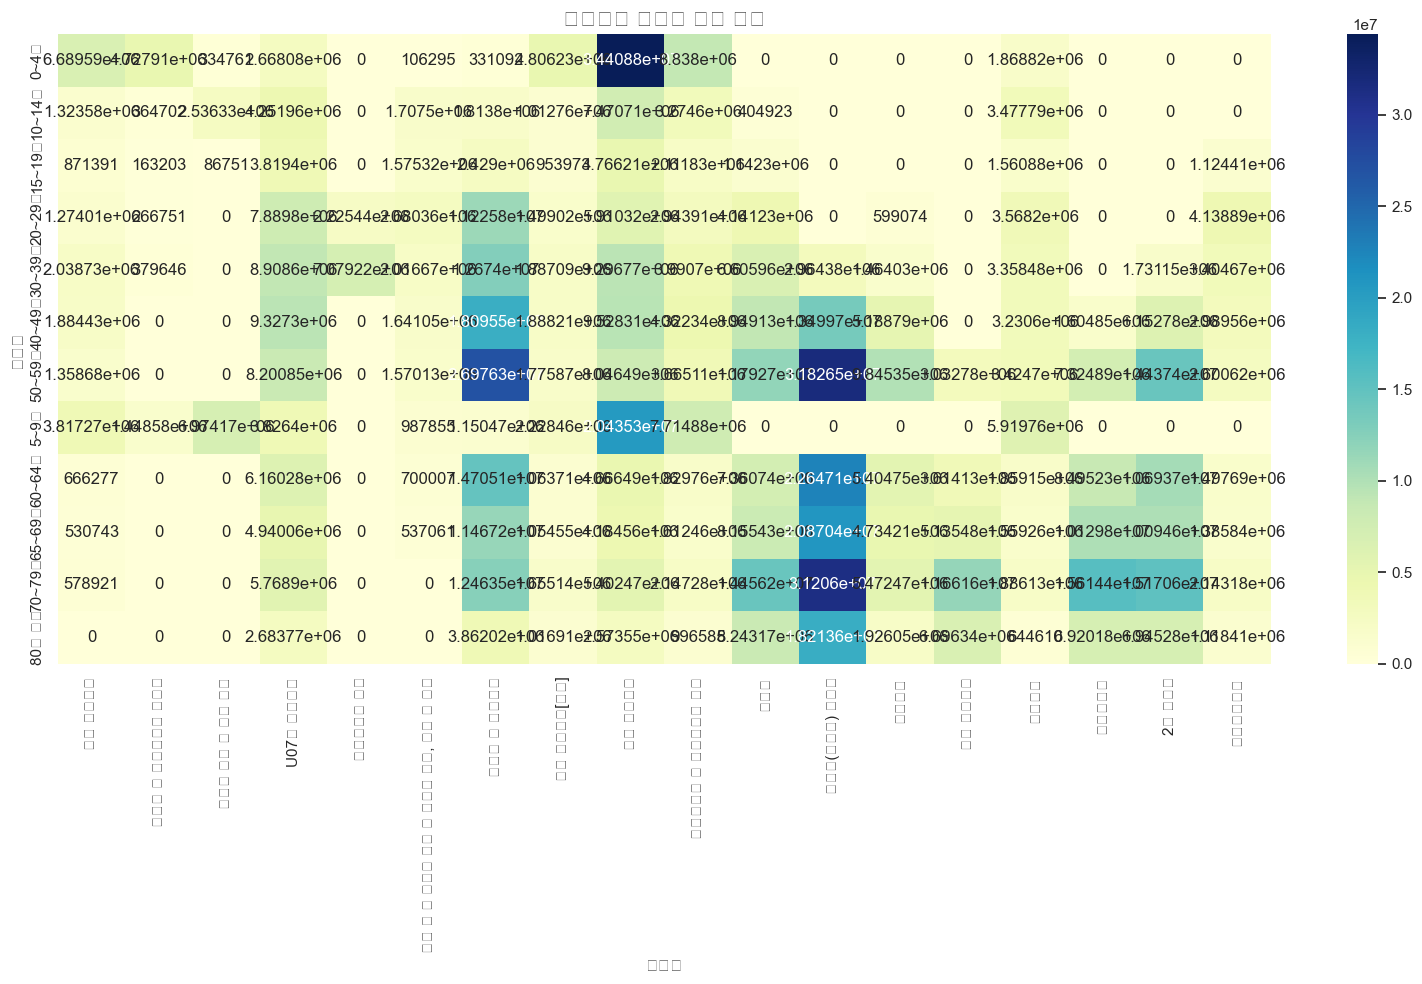

In [84]:
# 연령대별 상위 질환 시각화
pivot_age_disease = pd.pivot_table(
    age_disease, 
    values='내원일수',
    index='연령대',
    columns='질환명',
    aggfunc=np.sum,
    fill_value=0
)

# 각 연령대별 상위 5개 질환만 선택
top_diseases_all = []
for age in pivot_age_disease.index:
    top_5 = pivot_age_disease.loc[age].nlargest(5).index.tolist()
    top_diseases_all.extend(top_5)

top_diseases_unique = list(set(top_diseases_all))
pivot_selected = pivot_age_disease[top_diseases_unique]

plt.figure(figsize=(16, 10))
sns.heatmap(pivot_selected, annot=True, cmap='YlGnBu', fmt='g')
plt.title('연령대별 다빈도 질환 분포', fontsize=16)
plt.tight_layout()
plt.show()

In [88]:
## 8. 지역별 분석

# 지역별 평균 진료비
region_cost_query = """
    SELECT r.region_name as 지역명, AVG(rc.patient_payment_per_visit) as 평균방문당진료비, AVG(rc.patient_payment_per_patient) as 평균환자당진료비,
        AVG(rc.patient_count) as 평균환자수, SUM(rc.patient_count) as 총환자수, AVG(rc.visit_count) as 평균방문일수,
        AVG(rc.insurance_payment) as 평균보험자비용, AVG(rc.medical_care_cost_total) as 평균요양급여총비용
    FROM region_based_costs rc
    JOIN regions r ON rc.region_id = r.region_id
    GROUP BY r.region_name
    ORDER BY 평균환자당진료비 DESC
"""
region_cost = pd.read_sql_query(region_cost_query, engine)

print("\n지역별 평균 진료비:")
display(region_cost)


지역별 평균 진료비:


,지역명,평균방문당진료비,평균환자당진료비,평균환자수,총환자수,평균방문일수,평균보험자비용,평균요양급여총비용
0,광주,24.391050,94.871598,38297.785388,25161645,112773.229833,5.957074e+06,8.148239e+06
1,부산,21.848417,94.102146,82497.616438,54200934,258882.739726,1.274213e+07,1.737892e+07
2,울산,21.887473,92.752694,26729.433790,17561238,76118.191781,3.340941e+06,4.598898e+06
3,경남,20.724140,83.525205,76425.706240,50211689,228997.954338,1.009431e+07,1.382926e+07
4,대구,22.736377,83.106606,61639.053272,40496858,180225.861492,8.823333e+06,1.211625e+07
5,서울,24.755236,79.817047,254811.933029,167411440,683577.235921,3.427226e+07,4.743841e+07
6,인천,22.115358,79.059970,66196.447489,43491066,185313.561644,8.340877e+06,1.145354e+07
7,전북,20.020563,78.810746,44070.136986,28954080,142026.730594,6.145108e+06,8.295341e+06
8,대전,21.766195,77.394840,39241.386606,25781591,110552.547945,5.196286e+06,7.077879e+06
9,전남,19.385449,77.106347,41605.488584,27334806,138643.751903,5.950117e+06,7.998735e+06


C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\639979274.py:17: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\639979274.py:17: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\639979274.py:17: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\639979274.py:17: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\639979274.py:17: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\639979274.py:17: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) Arial.
  plt.tight_layou

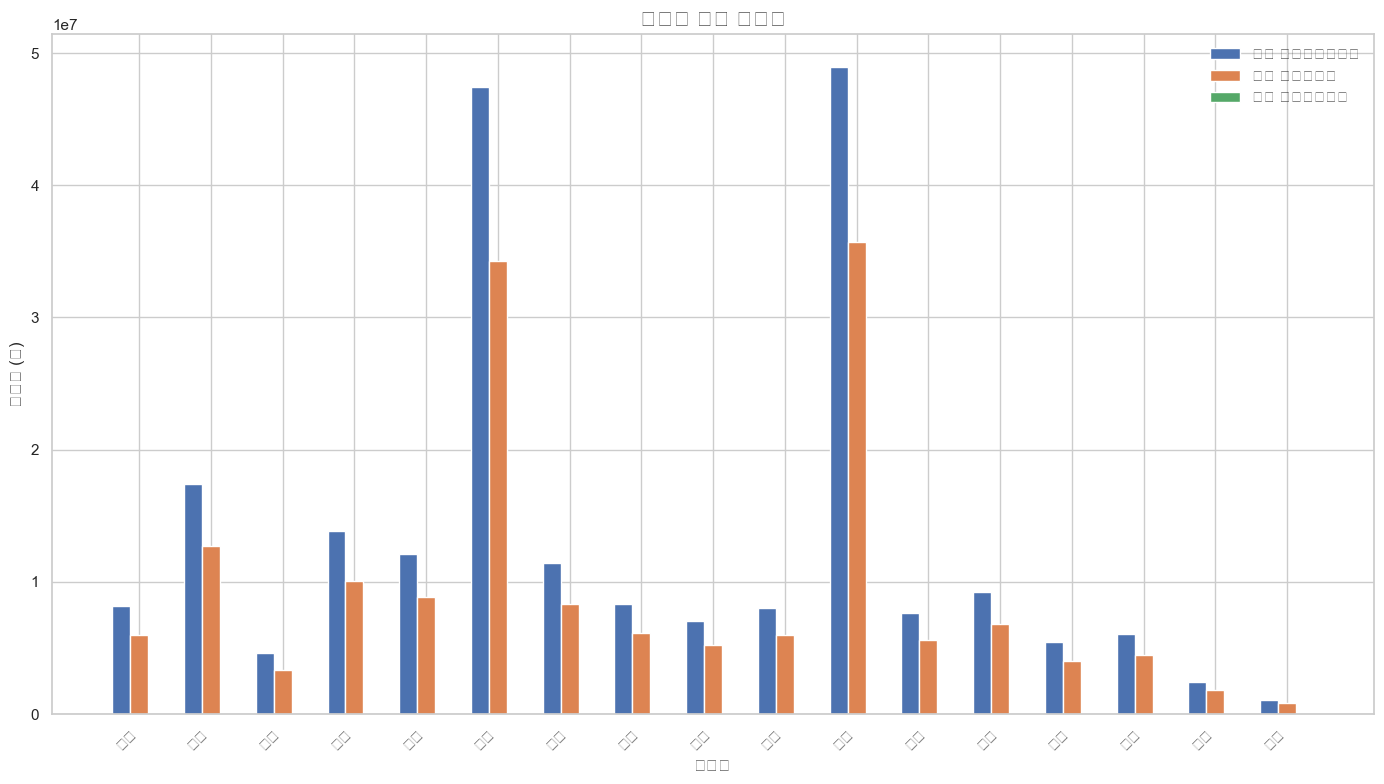

In [90]:
# 지역별 진료비 시각화
fig, ax = plt.subplots(figsize=(14, 8))
x = np.arange(len(region_cost))
width = 0.25

rects1 = ax.bar(x - width, region_cost['평균요양급여총비용'], width, label='평균 요양급여총비용')
rects2 = ax.bar(x, region_cost['평균보험자비용'], width, label='평균 보험자비용')
rects3 = ax.bar(x + width, region_cost['평균환자당진료비'], width, label='평균 환자당진료비')

ax.set_title('지역별 평균 진료비', fontsize=16)
ax.set_xlabel('지역명', fontsize=12)
ax.set_ylabel('진료비 (원)', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(region_cost['지역명'], rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

데이터 최대값: 0.32383570311082605
데이터 최소값: 0.18596195944639912


C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\2520203243.py:24: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\2520203243.py:24: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\2520203243.py:24: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\2520203243.py:24: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\2520203243.py:24: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\2520203243.py:24: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) Arial.
  plt.tight_la

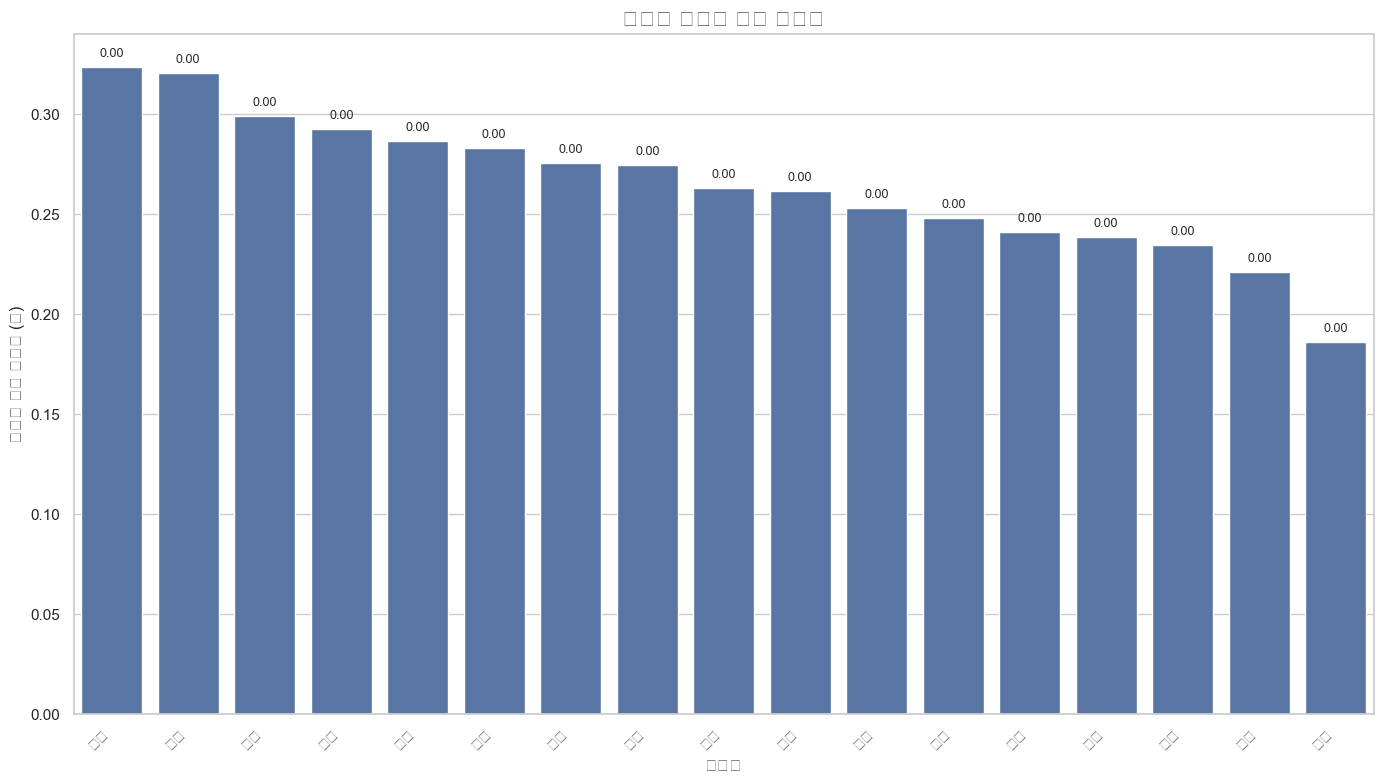

In [ ]:
# 지역별 환자수 대비 진료비 분석
region_cost['평균환자당진료비'] = region_cost['평균요양급여총비용'] / region_cost['총환자수']

# 데이터 확인
print("데이터 최대값:", region_cost['평균환자당진료비'].max())
print("데이터 최소값:", region_cost['평균환자당진료비'].min())

region_cost_sorted = region_cost.sort_values('평균환자당진료비', ascending=False)

plt.figure(figsize=(14, 8), dpi=100)
ax = sns.barplot(x='지역명', y='평균환자당진료비', data=region_cost_sorted)
plt.title('지역별 환자당 평균 진료비', fontsize=16)
plt.xlabel('지역명', fontsize=12)
plt.ylabel('환자당 평균 진료비 (원)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# 값 레이블 표시
for i, bar in enumerate(ax.patches):
    ax.text(bar.get_x() + bar.get_width()/2., 
            bar.get_height() + 0.005,  # 바로 위에 표시
            f'{int(bar.get_height()):.2f}',
            ha='center', fontsize=9, rotation=0)

plt.tight_layout()
plt.show()


In [108]:
## 9. 의료기관 종별 분석

# 의료기관 종별 평균 진료비
hospital_cost_query = """
    SELECT h.hospital_type as 의료기관종별, AVG(hc.patient_payment_per_visit) as 평균방문당진료비, AVG(hc.patient_payment_per_patient) as 평균환자당진료비,
        AVG(hc.patient_count) as 평균환자수, SUM(hc.patient_count) as 총환자수, SUM(hc.visit_count) as 평균방문일수,
        AVG(hc.insurance_payment) as 평균보험자비용, AVG(hc.medical_care_cost_total) as 평균요양급여총비용

    FROM hospital_based_costs hc
    JOIN hospital_types h ON hc.hospital_type_id = h.hospital_type_id
    GROUP BY h.hospital_type
    ORDER BY 평균방문당진료비 DESC
"""
hospital_cost = pd.read_sql_query(hospital_cost_query, engine)

print("\n의료기관 종별 평균 진료비:")
display(hospital_cost)


의료기관 종별 평균 진료비:


,의료기관종별,평균방문당진료비,평균환자당진료비,평균환자수,총환자수,평균방문일수,평균보험자비용,평균요양급여총비용
0,상급종합병원,65.328158,193.485053,36800.165906,24177709,77091734,1.682371e+07,2.403146e+07
1,종합병원,36.819376,114.728584,102071.088280,67060705,201024256,2.872387e+07,4.057411e+07
2,병원급,23.745373,122.792283,123751.022831,81304422,335680272,3.323729e+07,4.537953e+07
3,의원급,13.165677,39.549102,995497.706240,654041993,1685676672,8.077085e+07,1.085750e+08
4,보건기관등,5.465459,10.772905,7361.548930,4814453,14041901,3.857375e+05,5.129581e+05


C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\233403032.py:15: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\233403032.py:15: UserWarning: Glyph 44553 (\N{HANGUL SYLLABLE GEUB}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\233403032.py:15: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\233403032.py:15: UserWarning: Glyph 54633 (\N{HANGUL SYLLABLE HAB}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\233403032.py:15: UserWarning: Glyph 48337 (\N{HANGUL SYLLABLE BYEONG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\233403032.py:15: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) Arial.
  plt.tight_

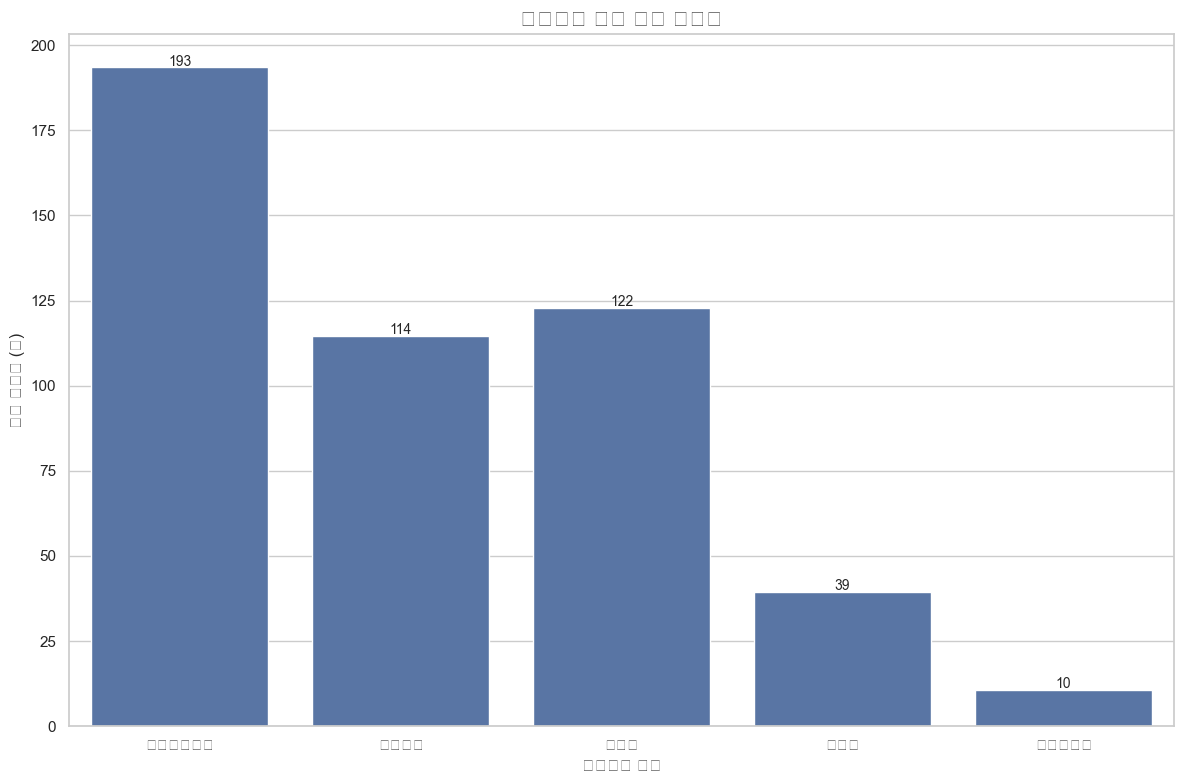

In [111]:
# 의료기관 종별 진료비 시각화
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='의료기관종별', y='평균환자당진료비', data=hospital_cost)
plt.title('의료기관 종별 평균 진료비', fontsize=16)
plt.xlabel('의료기관 종별', fontsize=12)
plt.ylabel('평균 진료비 (원)', fontsize=12)

# 값 레이블 표시
for i, bar in enumerate(ax.patches):
    ax.text(bar.get_x() + bar.get_width()/2., 
            bar.get_height() + 0.5,
            f'{int(bar.get_height()):,}',
            ha='center', fontsize=10, rotation=0)

plt.tight_layout()
plt.show()


C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\3959618006.py:16: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\3959618006.py:16: UserWarning: Glyph 44553 (\N{HANGUL SYLLABLE GEUB}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\3959618006.py:16: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\3959618006.py:16: UserWarning: Glyph 54633 (\N{HANGUL SYLLABLE HAB}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\3959618006.py:16: UserWarning: Glyph 48337 (\N{HANGUL SYLLABLE BYEONG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\3959618006.py:16: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) Arial.
  plt.

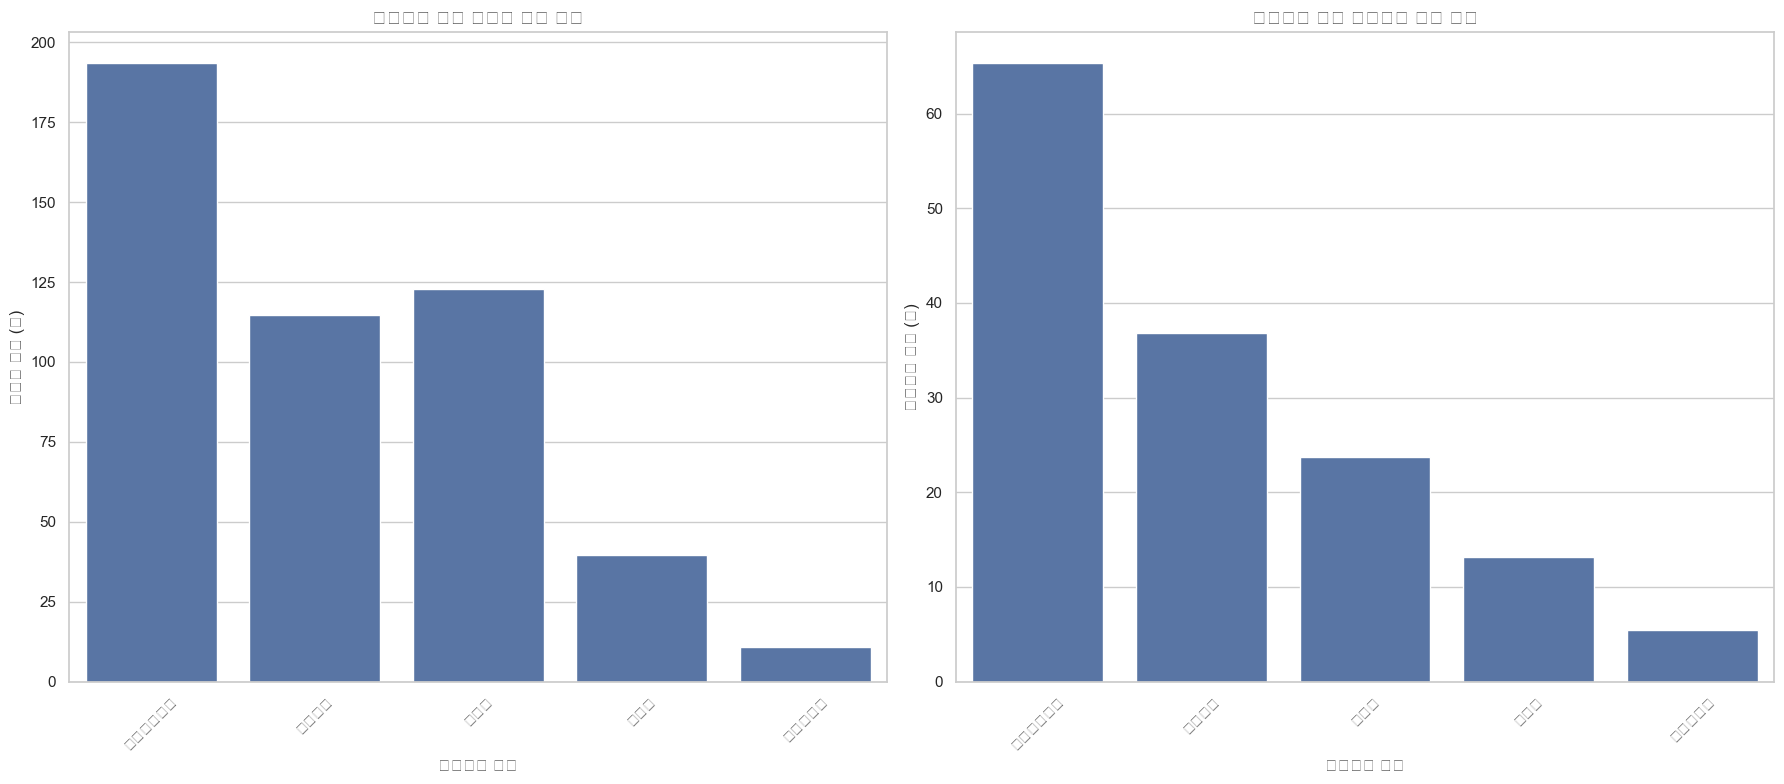

In [112]:
# 환자당 비용 및 내원일당 비용 시각화
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.barplot(x='의료기관종별', y='평균환자당진료비', data=hospital_cost, ax=ax[0])
ax[0].set_title('의료기관 종별 환자당 평균 비용', fontsize=14)
ax[0].set_xlabel('의료기관 종별', fontsize=12)
ax[0].set_ylabel('환자당 비용 (원)', fontsize=12)
ax[0].tick_params(axis='x', rotation=45)

sns.barplot(x='의료기관종별', y='평균방문당진료비', data=hospital_cost, ax=ax[1])
ax[1].set_title('의료기관 종별 내원일당 평균 비용', fontsize=14)
ax[1].set_xlabel('의료기관 종별', fontsize=12)
ax[1].set_ylabel('내원일당 비용 (원)', fontsize=12)
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [134]:
## 10. 상관관계 분석

# 변수 간 상관관계 분석
corr_data_query = """
    SELECT medical_care_cost_total as 요양급여총비용, insurance_payment as 보험자비용, patient_payment_per_patient as 환자당진료비, 
    patient_payment_per_visit as 방문당진료비, visit_count as 내원일수, patient_count as 환자수
    FROM raw_medical_data
"""
corr_data = pd.read_sql_query(corr_data_query, engine)

# 상관관계 계산
corr_matrix = corr_data.corr()

print("\n변수 간 상관관계:")
display(corr_matrix)


변수 간 상관관계:


,요양급여총비용,보험자비용,환자당진료비,방문당진료비,내원일수,환자수
요양급여총비용,1.000000,0.996188,0.327404,0.130974,0.763029,0.638225
보험자비용,0.996188,1.000000,0.343632,0.117861,0.756895,0.625452
환자당진료비,0.327404,0.343632,1.000000,0.470959,0.071246,-0.064999
방문당진료비,0.130974,0.117861,0.470959,1.000000,-0.073647,-0.083740
내원일수,0.763029,0.756895,0.071246,-0.073647,1.000000,0.867895
환자수,0.638225,0.625452,-0.064999,-0.083740,0.867895,1.000000


c:\Users\SSAFY\Desktop\Medi-Budget\backend\venv\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\SSAFY\Desktop\Medi-Budget\backend\venv\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\SSAFY\Desktop\Medi-Budget\backend\venv\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 44553 (\N{HANGUL SYLLABLE GEUB}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\SSAFY\Desktop\Medi-Budget\backend\venv\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\SSAFY\Desktop\Medi-Budget\backend\venv\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\SSAFY\Desktop\Medi-Budget\backend\venv\lib\site-packages\se

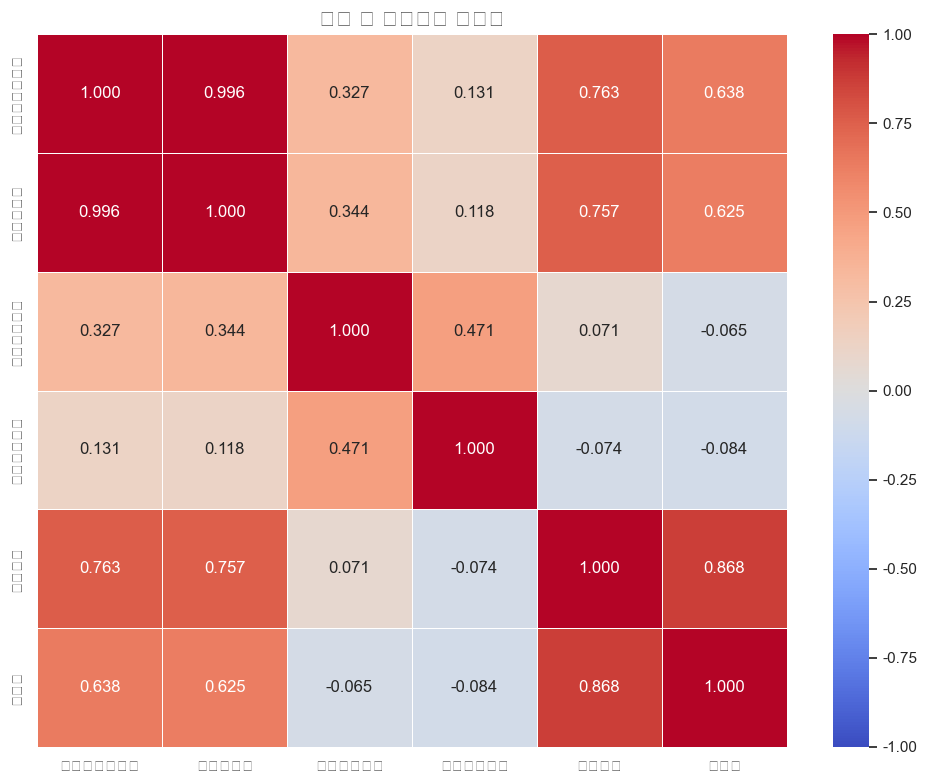

In [135]:
# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, fmt='.3f')
plt.title('변수 간 상관관계 히트맵', fontsize=16)
plt.tight_layout()
plt.show()

In [136]:
## 11. 내원일수 분석

# 질환별 평균 내원일수
disease_visits_query = """
    SELECT d.disease_name as 질병명, AVG(rd.visit_count) as 평균내원일수, AVG(rd.patient_payment_per_visit) as 평균방문당진료비, AVG(rd.patient_payment_per_patient) as 평균환자당진료비
    FROM raw_medical_data rd
    JOIN diseases d ON rd.disease_name = d.disease_name
    GROUP BY d.disease_name
    ORDER BY 평균내원일수 DESC
    LIMIT 15
"""
disease_visits = pd.read_sql_query(disease_visits_query, engine)

print("\n평균 내원일수 상위 15개 질환:")
display(disease_visits)


평균 내원일수 상위 15개 질환:


,질병명,평균내원일수,평균방문당진료비,평균환자당진료비
0,본태성(원발성) 고혈압,4.940860e+06,8.144023,44.390115
1,급성 기관지염,3.454521e+06,5.991569,16.309608
2,치은염 및 치주질환,3.447642e+06,14.604118,29.786765
3,2형 당뇨병,2.335681e+06,13.297931,80.935057
4,U07의 응급사용,2.255936e+06,20.254118,111.162059
5,등통증,2.245244e+06,14.164167,52.260937
6,알츠하이머병에서의 치매(G30.-+),2.111494e+06,20.604722,690.104583
7,무릎관절증,1.978292e+06,27.661548,176.154524
8,혈관운동성 및 알레르기성 비염,1.278692e+06,6.427941,13.759216
9,기타 척추병증,1.237481e+06,22.004691,120.329012


C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\1706823007.py:16: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\1706823007.py:16: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\1706823007.py:16: UserWarning: Glyph 45236 (\N{HANGUL SYLLABLE NAE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\1706823007.py:16: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\1706823007.py:16: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\1706823007.py:16: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Arial.
  plt.tigh

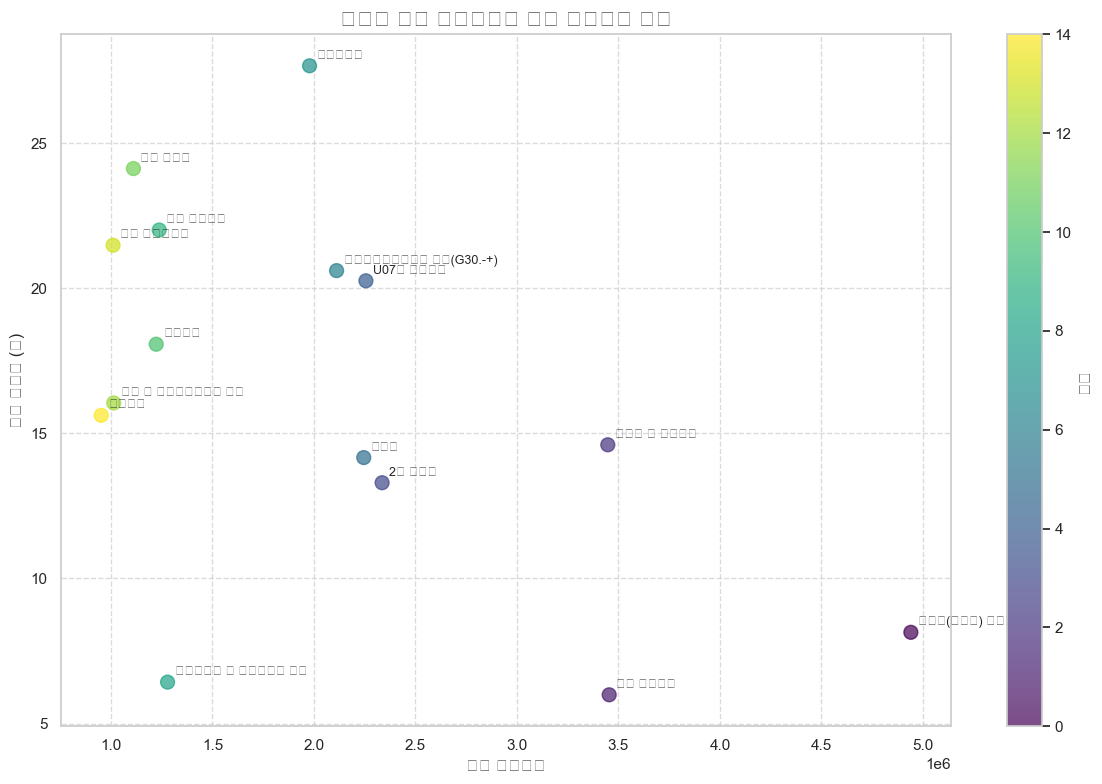

In [137]:
# 평균 내원일수와 평균 총비용 간의 관계
plt.figure(figsize=(12, 8))
scatter = plt.scatter(disease_visits['평균내원일수'], disease_visits['평균방문당진료비'], 
                     s=100, c=range(len(disease_visits)), cmap='viridis', alpha=0.7)

# 주요 질환에 레이블 표시
for i, txt in enumerate(disease_visits['질병명']):
    plt.annotate(txt, (disease_visits['평균내원일수'].iloc[i], disease_visits['평균방문당진료비'].iloc[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.title('질환별 평균 내원일수와 평균 총비용의 관계', fontsize=16)
plt.xlabel('평균 내원일수', fontsize=12)
plt.ylabel('평균 총비용 (원)', fontsize=12)
plt.colorbar(scatter, label='순위')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [138]:
## 12. 환자 비용 부담률 분석

# 질환별 환자 부담률
patient_burden_query = """
    SELECT d.disease_name as 질병명, 
           AVG(rd.insurance_payment) as 평균보험자비용, AVG(rd.medical_care_cost_total) as 평균요양급여총비용,
           (AVG(rd.medical_care_cost_total - rd.insurance_payment) / AVG(rd.medical_care_cost_total)) * 100 as 환자부담률
    FROM raw_medical_data rd
    JOIN diseases d ON rd.disease_code = d.disease_code
    GROUP BY d.disease_name
    ORDER BY 환자부담률 DESC
    LIMIT 15
"""
patient_burden = pd.read_sql_query(patient_burden_query, engine)

print("\n환자 부담률 상위 15개 질환:")
display(patient_burden)


환자 부담률 상위 15개 질환:


,질병명,평균보험자비용,평균요양급여총비용,환자부담률
0,분만후 관리 및 검사,6.046769e+05,1.420921e+06,57.444710
1,시각장애,1.221252e+06,2.299106e+06,46.881469
2,두통,6.866703e+06,1.288089e+07,46.690773
3,기타 내분비장애,1.191094e+06,2.231240e+06,46.617385
4,뇌하수체의 기능항진,4.818689e+06,8.899697e+06,45.855579
5,기침,1.891653e+06,3.463655e+06,45.385647
6,기타 비독성 고이터,4.231110e+06,7.711474e+06,45.132282
7,만성 바이러스간염,1.006786e+07,1.829194e+07,44.960128
8,달리 분류되지 않은 사춘기의 장애,7.120376e+06,1.272405e+07,44.039996
9,기타 두통증후군,5.165715e+06,9.051503e+06,42.929759


C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\621871276.py:16: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\621871276.py:16: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\621871276.py:16: UserWarning: Glyph 54980 (\N{HANGUL SYLLABLE HU}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\621871276.py:16: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\621871276.py:16: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\621871276.py:16: UserWarning: Glyph 48143 (\N{HANGUL SYLLABLE MIC}) missing from font(s) Arial.
  plt.tight_layout()

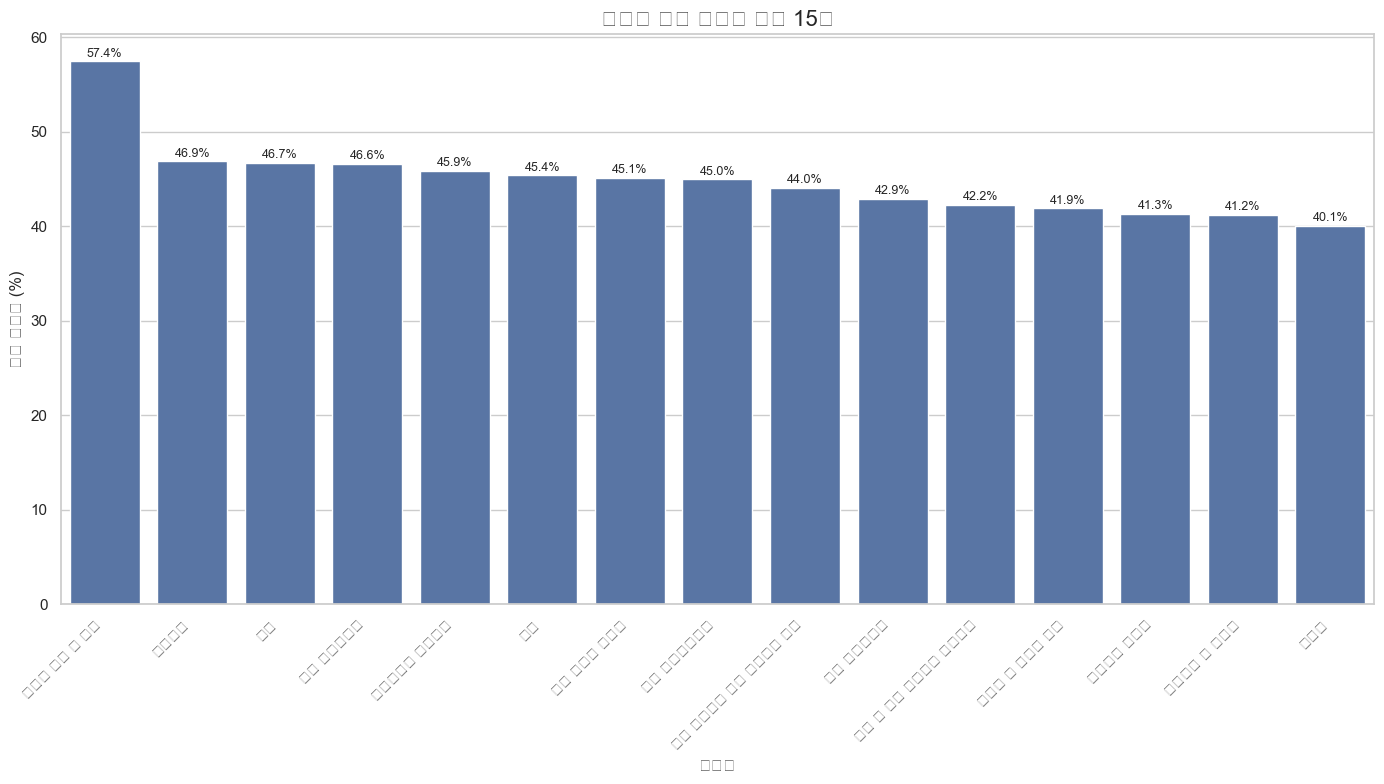

In [139]:
# 환자 부담률 시각화
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='질병명', y='환자부담률', data=patient_burden)
plt.title('질환별 환자 부담률 상위 15개', fontsize=16)
plt.xlabel('질병명', fontsize=12)
plt.ylabel('환자 부담률 (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# 값 레이블 표시
for i, bar in enumerate(ax.patches):
    ax.text(bar.get_x() + bar.get_width()/2., 
            bar.get_height() + 0.5,
            f'{bar.get_height():.1f}%',
            ha='center', fontsize=9, rotation=0)

plt.tight_layout()
plt.show()

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\405300894.py:12: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\405300894.py:12: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\405300894.py:12: UserWarning: Glyph 44553 (\N{HANGUL SYLLABLE GEUB}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\405300894.py:12: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\405300894.py:12: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11952\405300894.py:12: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) Arial.
  plt.tight_layout

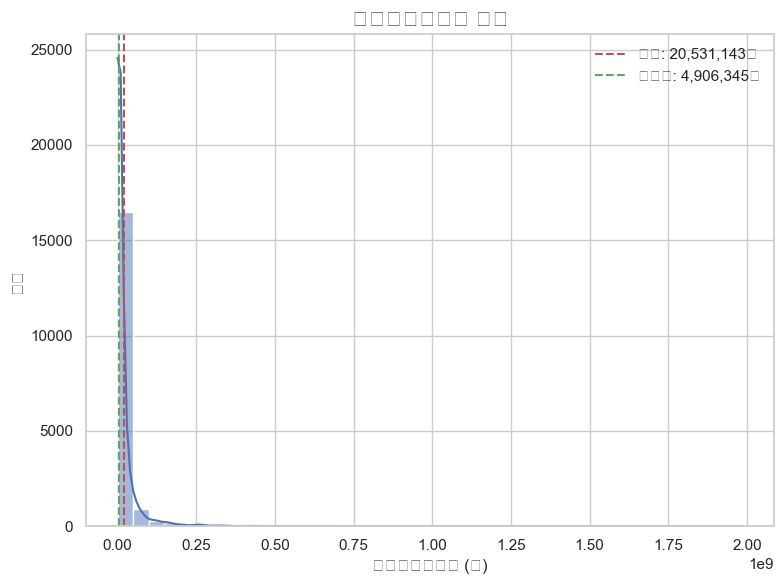

In [ ]:
## 13. 의료비 분포 분석

# 요양급여총비용 분포 분석
plt.figure(figsize=(8, 6))
sns.histplot(corr_data['요양급여총비용'], kde=True, bins=50)
plt.title('요양급여총비용 분포', fontsize=16)
plt.xlabel('요양급여총비용 (원)', fontsize=12)
plt.ylabel('빈도', fontsize=12)
plt.axvline(corr_data['요양급여총비용'].mean(), color='r', linestyle='--', label=f'평균: {int(corr_data["요양급여총비용"].mean()):,}원')
plt.axvline(corr_data['요양급여총비용'].median(), color='g', linestyle='--', label=f'중앙값: {int(corr_data["요양급여총비용"].median()):,}원')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
## 14. EDA 결론 및 인사이트 정리
print("""
## EDA 결과 주요 인사이트

1. 다빈도 질환별 진료비 특성 파악
   - 다빈도 질환들의 평균 진료비와 환자 부담률 확인
   - 질환별 진료 특성(내원일수 등) 차이 확인

2. 연령대별 진료비 패턴 분석 결과
   - 연령에 따른 진료비 추이 및 특성 파악
   - 고령층과 유아층의 진료비 특성 비교

3. 지역별 진료비 차이 및 주요 원인 분석
   - 지역별 평균 진료비 차이 확인
   - 환자당 진료비 차이 원인 파악

4. 의료기관 종별 진료비 차이 및 특성
   - 의료기관 종별에 따른 진료비 차이 분석
   - 환자당 비용 및 내원일당 비용 차이 확인

5. 내원일수와 진료비 간의 관계
   - 내원일수가 길수록 진료비가 높아지는 경향 확인
   - 질환별 내원일수 차이 파악

6. 환자 부담률이 높은 질환 분석
   - 환자 부담률이 높은 질환 확인
   - 보험 적용 범위와의 관계 분석

7. 모델 개발을 위한 주요 예측 변수 파악
   - 진료비 예측에 중요한 변수 식별
   - 변수 간 상관관계를 통한 모델 설계 방향 설정
""")